Cleaned columns: ['name', 'online_order', 'book_table', 'rating', 'votes', 'location', 'rest_type', 'cuisines', 'approx_cost_for two people_', 'listed_in_type_', 'listed_in_city_']


<ipython-input-1-870806186>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"approx_cost_for two people_": "cost_for_two"}, inplace=True)


Cleaned dataset saved as cleaned_zomato_data.csv

 Top 10 Rated Cuisines:
                                                       rating  votes  \
cuisines                                                              
Continental, North Indian, Italian, South India...  4.900000  99531   
Healthy Food, Salad, Mediterranean                  4.900000    246   
Asian, Chinese, Thai, Momos                         4.900000  42273   
Continental, North Indian, Chinese, European, B...  4.800000   4910   
Asian, Mediterranean, North Indian, Bbq             4.800000  29956   
North Indian, European, Mediterranean, Bbq          4.800000  35637   
European, Mediterranean, North Indian, Bbq          4.789474  86418   
American, Tex-Mex, Burger, Bbq, Mexican             4.750000  48619   
Italian, American, Pizza                            4.700000  29912   
Asian, Burmese                                      4.700000   6539   

                                                    cost_for_two  
cuisi

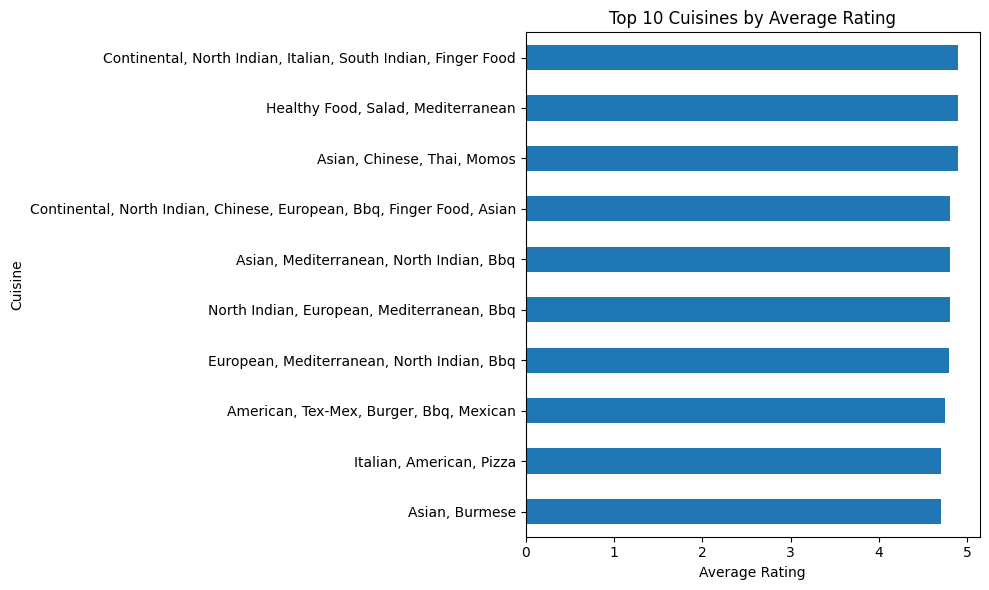


 Top 10 Popular Cuisines by Votes:
                                                      rating   votes  \
cuisines                                                              
North Indian                                       3.587328  516306   
Pizza, Cafe, Italian                               4.410588  347520   
Cafe, American, Burger, Steak                      4.595349  301059   
North Indian, Chinese                              3.412109  258225   
North Indian, Mughlai, South Indian, Chinese       4.094643  227930   
South Indian                                       3.630057  161645   
North Indian, Thai, Japanese, Continental, Cafe    4.688235  161365   
North Indian, European, Mediterranean              4.700000  136485   
North Indian, Continental, Chinese                 3.351220  122751   
North Indian, European, Mediterranean, Bbq, Kebab  4.492683  108425   

                                                   cost_for_two  
cuisines                                    

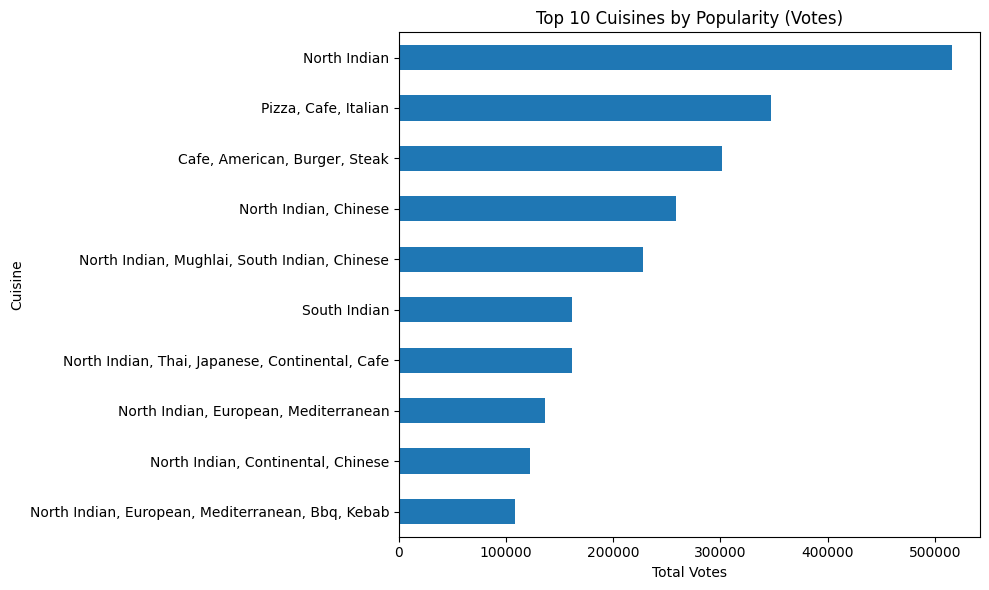


 Best Rated Restaurants:
                                 name  \
3172     Byg Brewski Brewing Company   
4659          Belgian Waffle Factory   
3825     Byg Brewski Brewing Company   
4132          Belgian Waffle Factory   
3936     Byg Brewski Brewing Company   
6318                        Flechazo   
6585       AB's - Absolute Barbecues   
5774                    Punjab Grill   
5450                        Flechazo   
9138  Asia Kitchen By Mainland China   

                                               cuisines  rating  votes  \
3172  Continental, North Indian, Italian, South Indi...     4.9  16345   
4659                                           Desserts     4.9   1746   
3825  Continental, North Indian, Italian, South Indi...     4.9  16345   
4132                                           Desserts     4.9   1746   
3936  Continental, North Indian, Italian, South Indi...     4.9  16345   
6318            Asian, Mediterranean, North Indian, Bbq     4.9   2745   
6585         E

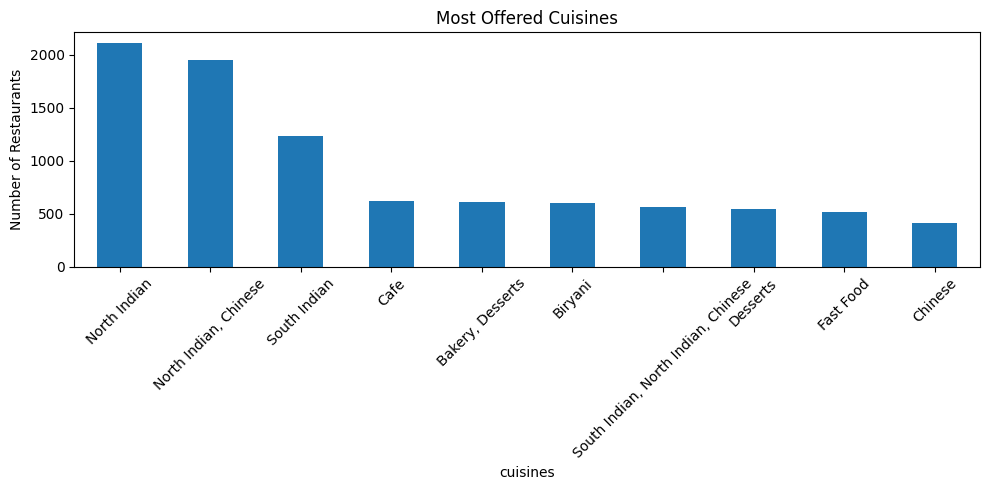

In [1]:

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("data.xlsx", sheet_name="zomato")

df = df.drop_duplicates()

df.columns = df.columns.str.strip().str.lower().str.replace(r"[^\w\s]", "_", regex=True)
print("Cleaned columns:", df.columns.tolist())

df.rename(columns={"approx_cost_for two people_": "cost_for_two"}, inplace=True)

df.loc[:, 'cuisines'] = df['cuisines'].str.strip().str.title()
df.loc[:, 'location'] = df['location'].str.strip().str.title()

df = df[df['rating'] > 0]
df = df[df['cost_for_two'] > 0]

df['rating'] = df['rating'].astype(float)
df['votes'] = df['votes'].astype(int)
df['cost_for_two'] = df['cost_for_two'].astype(int)

df.to_csv("cleaned_zomato_data.csv", index=False)
print("Cleaned dataset saved as cleaned_zomato_data.csv")

cuisine_summary = df.groupby("cuisines").agg({
    "rating": "mean",
    "votes": "sum",
    "cost_for_two": "mean"
}).sort_values(by="rating", ascending=False)


top_rated = cuisine_summary.sort_values(by="rating", ascending=False).head(10)
print("\n Top 10 Rated Cuisines:\n", top_rated)


top_rated.plot(kind='barh', y='rating', figsize=(10,6), title="Top 10 Cuisines by Average Rating", legend=False)
plt.xlabel("Average Rating")
plt.ylabel("Cuisine")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

top_popular = cuisine_summary.sort_values(by="votes", ascending=False).head(10)
print("\n Top 10 Popular Cuisines by Votes:\n", top_popular)

top_popular.plot(kind='barh', y='votes', figsize=(10,6), title="Top 10 Cuisines by Popularity (Votes)", legend=False)
plt.xlabel("Total Votes")
plt.ylabel("Cuisine")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

best_restaurants = df[df['rating'] >= 4.8][['name', 'cuisines', 'rating', 'votes', 'location']]
print("\n Best Rated Restaurants:\n", best_restaurants.sort_values(by='rating', ascending=False).head(10))

cuisine_count = df['cuisines'].value_counts().head(10)
cuisine_count.plot(kind='bar', title='Most Offered Cuisines', figsize=(10,5))
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
